In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

## Data Preparation

- Source of data https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Clearning data

In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
cat_col = df.dtypes[df.dtypes == "object"].index.tolist()
for col in cat_col:
    df[col] = df[col].str.lower().str.replace(" ", "_")

df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
tc = pd.to_numeric(df.totalcharges, errors="coerce")
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


### Handling missing values

In [7]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors="coerce")
df.totalcharges = df.totalcharges.fillna(0)

In [8]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [9]:
(df.churn == 'yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

In [10]:
df.churn = (df.churn == 'yes').astype(int)

## Setting up the validation framework

- Perform the train/validation/test split with Scikit-Learn's `train_test_split()` function.

In [11]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [12]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test)

(5634, 1409)

If we can get the 20% of the data for validation and 60% for training, we need to set the `test_size` parameter to 0.25 (because 0.25 * 0.8 = 0.2).

In [13]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train["churn"]
del df_val["churn"] 
del df_test["churn"]

y_train

array([0, 0, 1, ..., 1, 0, 1])

## EDA

Exploratory data analysis on full train dataset

In [16]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [19]:
# Calculating the churn rate
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [21]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [55]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [26]:
df_full_train[categorical].nunique()

customerid          5634
gender                 2
seniorcitizen          2
partner                2
dependents             2
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
churn                  2
dtype: int64

## Feature importance

Still part of EDA, we're identifying which features affect our target variables:

- Churn rate
- Risk ratio
- Mutual information

### Churn rate

In [28]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [29]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

For gender, it does not really matter if customer male or female the churn rate is almost the same.

In [30]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [33]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [35]:
global_churn_rate - churn_partner

0.06493474245795922

In [34]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [36]:
global_churn_rate - churn_no_partner

-0.05984095297455855

### Risk ratio

In [37]:
churn_no_partner / global_churn_rate

1.2216593879412643

In [38]:
churn_partner / global_churn_rate

0.7594724924338315

The step:
1. Difference, if global - group is positive, then the group is less likely to churn, if negative, then more likely to churn
2. Risk ratio, if group / global is > 1, then the group is more likely impact on churn, if < 1, then less likely to churn

In [ ]:
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn_rate AS difference,
    AVG(churn) / global_churn_rate AS risk_ratio
FROM
    data
GROUP BY
    gender;

In [44]:
from IPython.display import display
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()
    

customerid


,mean,count,diff,risk
customerid,,,,
0002-orfbo,0.0,1,-0.269968,0.000000
0004-tlhlj,1.0,1,0.730032,3.704142
0011-igkff,1.0,1,0.730032,3.704142
0013-exchz,1.0,1,0.730032,3.704142
0013-mhzwf,0.0,1,-0.269968,0.000000
...,...,...,...,...
9987-lutyd,0.0,1,-0.269968,0.000000
9992-rramn,1.0,1,0.730032,3.704142
9992-ujoel,0.0,1,-0.269968,0.000000




gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121




churn


,mean,count,diff,risk
churn,,,,
0,0.0,4113,-0.269968,0.000000
1,1.0,1521,0.730032,3.704142


### Mutual Information

Mutual information is the concept from information theory that measures the amount of information obtained about one random variable through another random variable. In the context of feature selection for machine learning, mutual information can be used to quantify the dependency between a feature and the target variable.

In [45]:
from sklearn.metrics import mutual_info_score
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [48]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

We learn nothing from gender and churn in mutual information score, because the score is 0.0002, which is very close to 0.

In [49]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [50]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

df_full_train[categorical].apply(mutual_info_churn_score)

customerid          0.583227
gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
churn               0.583227
dtype: float64

In [56]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

We know that contract is more important variable.

### Correlation

Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It is a value that ranges from -1 to 1, where:
- 1 indicates a perfect positive linear relationship (as one variable increases, the other variable also increases)
- -1 indicates a perfect negative linear relationship (as one variable increases, the other variable decreases)

The example of positive correlation is when the tenure increases, the total charges also increase. The example of negative correlation is when the tenure increases, the churn decreases. Zero correlation indicates no effect on churn.

In [57]:
df_full_train.tenure.max()

72

In [64]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [61]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [62]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [72]:
df_full_train[(df_full_train.monthlycharges > 12) & (df_full_train.monthlycharges <= 50)]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
11,7017-vfuly,female,0,yes,no,2,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,bank_transfer_(automatic),20.10,43.15,0
15,1814-wfgvs,male,0,yes,yes,72,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,mailed_check,48.90,3527.00,0
16,3996-znwyk,male,1,yes,yes,71,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,credit_card_(automatic),19.80,1388.45,0
17,0902-xkxpn,male,0,yes,yes,69,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,bank_transfer_(automatic),20.20,1376.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5622,0827-itjph,male,0,no,no,36,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,yes,credit_card_(automatic),18.55,689.00,0
5624,5345-bmkwb,male,0,yes,no,8,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,20.25,158.35,0
5625,1131-qqzeb,male,1,yes,no,71,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,bank_transfer_(automatic),23.95,1756.20,0
5627,7446-sfaoa,female,0,yes,no,37,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,bank_transfer_(automatic),19.85,717.50,0


## One-hot encoding

Use scikit-learn to encode categorical variables.

In [76]:
from sklearn.feature_extraction import DictVectorizer

In [77]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [ ]:
df_train[['gender', 'contract']].iloc[:10].to_dict(orient='records')

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'}]

In [87]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(dicts)

DictVectorizer(sparse=False)

In [88]:
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

In [89]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male', 'tenure'],
      dtype=object)

In [90]:
train_dicts = df_train[categorical +  numerical].to_dict(orient='records')
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [91]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [95]:
list(dv.transform(train_dicts[:5])[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

In [96]:
X_train = dv.transform(train_dicts)
X_train.shape

(4225, 45)

In [97]:
val_dicts = df_val[categorical +  numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Logistic Regression

- Binary classification
- Linear vs Logistic regression

$
g(xi) = sigmoid(w0 + w^T * xi) = 1 / (1 + exp(-(w0 + w^T * xi)))
$

In [101]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-7, 7, 51)
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

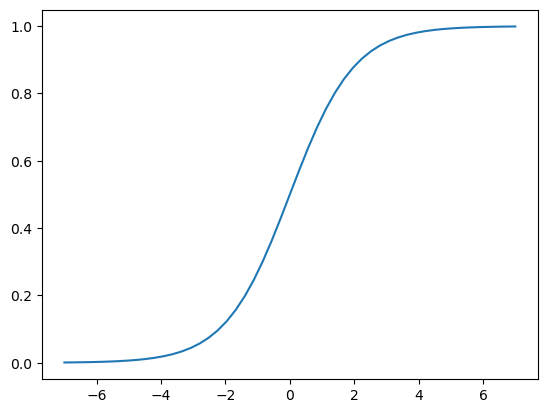

In [102]:
plt.plot(z, sigmoid(z))

In [ ]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):  
        result = result + w[j]*xi[j]
    
    return result

def logistic_regression(xi):
    result = w0
    
    for j in range(len(w)):  
        score = score + w[j]*xi[j]
    
    result = sigmoid(score)
    return result

### Using Scikit-Learn

In [103]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # solver='liblinear', random_state=1
model.fit(X_train, y_train)

c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
model.intercept_[0]

-0.10924048213915055

In [105]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.232,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.06 ,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.101, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.071,  0.   ])

In [107]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

It is called hard prediction because all we have is exactly 0 or 1. Soft prediction is when we have probabilities between 0 and 1.

In [108]:
model.predict_log_proba(X_train)

array([[-0.10039823, -2.34838984],
       [-1.13789283, -0.3863887 ],
       [-1.00482683, -0.45587673],
       ...,
       [-0.75790201, -0.63233173],
       [-0.04325445, -3.16220453],
       [-1.19979269, -0.35847178]])

We only interested in the probability of 1, so we can use `predict_proba()` method and select the second column.

In [113]:
model.predict_proba(X_train)[:, 1]

array([0.09552285, 0.67950635, 0.63389197, ..., 0.53135139, 0.04233232,
       0.69874334])

In [114]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00896751, 0.20370321, 0.21142808, ..., 0.13626642, 0.79988073,
       0.83747148])

In [115]:
y_pred >= 0.5

array([False, False, False, ..., False,  True,  True])

In [120]:
chrun_decision = (y_pred >= 0.5)

In [123]:
df_val[chrun_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 312, dtype: object

In [124]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [125]:
chrun_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [126]:
(y_val == chrun_decision).mean()

0.8026969481902059

In [127]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = chrun_decision.astype(int)
df_pred['actual'] = y_val
df_pred

,probability,prediction,actual
0,0.008968,0,0
1,0.203703,0,0
2,0.211428,0,0
3,0.543384,1,1
4,0.213090,0,0
...,...,...,...
1404,0.312687,0,0
1405,0.039247,0,1
1406,0.136266,0,0
1407,0.799881,1,1


In [128]:
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']
df_pred

,probability,prediction,actual,correct
0,0.008968,0,0,True
1,0.203703,0,0,True
2,0.211428,0,0,True
3,0.543384,1,1,True
4,0.213090,0,0,True
...,...,...,...,...
1404,0.312687,0,0,True
1405,0.039247,0,1,False
1406,0.136266,0,0,True
1407,0.799881,1,1,True


In [129]:
df_pred.correct.mean()

0.8026969481902059

## Model Interpretation

- Look at the coefficients
- Train a smaller model with fewer features

In [135]:
a = [1, 2, 3]
b = 'abc'

dict(list(zip(a, b)))

{1: 'a', 2: 'b', 3: 'c'}

In [136]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.474,
 'contract=one_year': -0.175,
 'contract=two_year': -0.407,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.232,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [138]:
small = ['contract', 'tenure', 'monthlycharges']
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [139]:
dict_train_small = df_train[small].iloc[:10].to_dict(orient='records')
dict_val_small = df_val[small].iloc[:10].to_dict(orient='records')

dv_small = DictVectorizer(sparse=False)
dv_small.fit(dict_train_small)

DictVectorizer(sparse=False)

In [140]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=two_year', 'monthlycharges',
       'tenure'], dtype=object)

In [145]:
X_train_small = dv_small.transform(dict_train_small)
X_val_small = dv_small.transform(dict_val_small)

model_small = LogisticRegression()
model_small.fit(X_train_small, y_train[:10])

LogisticRegression()

In [149]:
w0 = model_small.intercept_[0]
w0

-4.012800248057106

In [148]:
w = model_small.coef_[0]
w.round(3)

array([ 0.   , -0.   ,  0.065, -0.318])

In [151]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.0,
 'contract=two_year': -0.0,
 'monthlycharges': 0.065,
 'tenure': -0.318}

## Model Interpretation

In [152]:
sigmoid(-4.012800248057106  + 0.065*10)

0.03347849526957584

## Using the Model

In [161]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)

X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.churn.values

model = LogisticRegression()
model.fit(X_full_train, y_full_train)

c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [162]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

X_test = dv.transform(dicts_test)

In [ ]:
y_pred = odel.predict_proba(X_test)[:, 1]

array([0.05596293, 0.12977948, 0.3204709 , ..., 0.00649468, 0.1940478 ,
       0.65908914])

In [164]:
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean()

0.6465578424414479

In [169]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [170]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [171]:
X_small = dv.transform([customer])
model.predict_proba(X_small)[:, 1]

array([0.65908914])

In [173]:
y_test[-1]

1